[課題] 多峰性関数の回帰 次の関数 f(x1,x2) に対して回帰問題を考える． n 個のデータ (xi1,xi2), i=1,…,n からこの関数上の値 yi=f(xi1,xi2)+ε を生成し，データセット {(xi1,xi2,yi)}ni=1 をもとに，NN fNN(x1,x2) を学習し， (x1,x2,fNN(x1,x2)) を3次元プロットとして図示せよ．

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
from pandas import DataFrame

import tensorflow as tf
from tensorflow.keras import layers, models, initializers, callbacks
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.datasets import cifar10
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist

In [ ]:
def func1(x_1, x_2):
    return 10 - 10*np.exp(-0.2*(x_1**2+ x_2**2)) -np.exp((np.cos(x_1)+np.cos(x_2))/2)

x_1 = np.arange(-10, 10, 0.1)
x_2 = np.arange(-10, 10, 0.1)

X, Y = np.meshgrid(x_1, x_2)
Z = func1(X, Y)

x_1_test = np.arange(-9.05, 9.05, 0.2)
x_2_test = np.arange(-9.05, 9.05, 0.2)

X_test, Y_test = np.meshgrid(x_1_test, x_2_test)
Z_test = func1(X_test, Y_test)

In [ ]:
def generate_data(X,Y,Z):
  data_xy = np.empty((2,2))
  data_z = np.empty(0)
  for i in range(X.shape[0]):
    for j in range(X.shape[1]):
      data_xy = np.insert(data_xy, 2, [X[i, j], Y[i,j]], axis=0)
      data_z = np.insert(data_z, 0, Z[i,j], axis=0)
  data_xy = np.delete(data_xy, (0,1), 0)
  return data_xy, data_z

train_xy, train_z = generate_data(X,Y,Z)

test_xy, test_z = generate_data(X_test, Y_test, Z_test)

print(train_xy.shape, test_xy.shape)


(40000, 2) (8281, 2)


In [ ]:
print("data size : ", train_xy[0].shape)
print("data components : ", train_xy[0])
print("train_xy : ", train_xy.shape)
print("train_z : ", train_z.shape)
print("test_xy : ", test_xy.shape)
print("test_z : ", test_z.shape)

model_kadai1 = models.Sequential()
model_kadai1.add(layers.Dense(128, activation='softmax', input_shape=(2,),
                       name='softmax'))
model_kadai1.add(layers.Dense(128, activation='softmax'))
model_kadai1.add(layers.Dense(1))

model_kadai1.compile(optimizer='adam',
              loss='mse',
              metrics=['mae'])

model_kadai1.summary()

history = model_kadai1.fit(train_xy, train_z,
                    validation_data=(test_xy, test_z),
                    batch_size=32,
                    epochs=200)

data size :  (2,)
data components :  [9.9 9.9]
train_xy :  (40000, 2)
train_z :  (40000,)
test_xy :  (8281, 2)
test_z :  (8281,)
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 softmax (Dense)             (None, 128)               384       
                                                                 
 dense (Dense)               (None, 128)               16512     
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 17,025
Trainable params: 17,025
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
1250/1250 [==============================] - 5s 3ms/step - loss: 53.0734 - mae: 7.1292 - val_loss: 31.8232 - val_mae: 5.5314
Epoch 2/200
1250/1250 [===========================

259/259 [==============================] - 0s 2ms/step - loss: 0.0129 - mae: 0.0891
score:  [0.012883218005299568, 0.08905836939811707]


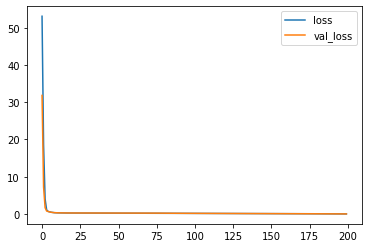

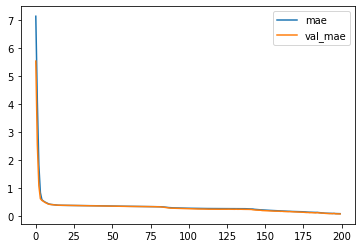

In [ ]:
score = model_kadai1.evaluate(test_xy, test_z)
print("score: ", score)
result = DataFrame(history.history)
result[['loss', 'val_loss']].plot();
result[['mae', 'val_mae']].plot();

In [ ]:
data_p = model_kadai1.predict(np.array(train_xy)).flatten()
print(train_z)
print(data_p)

Z_p = np.zeros((X.shape[0],X.shape[1]))
for i in range(X.shape[0]):
  for j in range(X.shape[1]):
    Z_p[i,j] = data_p[-1]
    data_p = np.delete(data_p, -1)

1250/1250 [==============================] - 2s 2ms/step
[9.58901196 9.59739877 9.60377697 ... 9.58718218 9.57858254 9.56788846]
[9.680908 9.673479 9.66588  ... 9.581029 9.589286 9.597211]


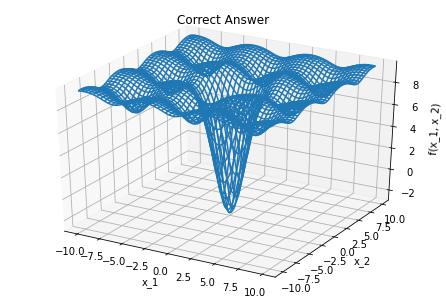

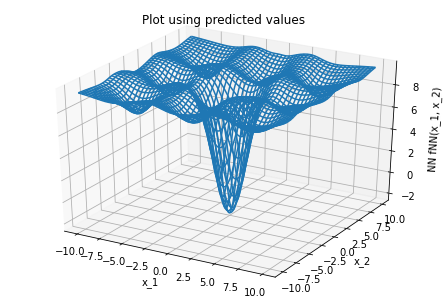

In [ ]:
fig1 = plt.figure()
ax1 = Axes3D(fig1)
ax1.set_xlabel("x_1");  ax1.set_ylabel("x_2"); ax1.set_zlabel("f(x_1, x_2)")
ax1.plot_wireframe(X, Y, Z)
plt.title('Correct Answer')
plt.show()

fig2 = plt.figure()
ax2 = Axes3D(fig2)
ax2.set_xlabel("x_1");  ax2.set_ylabel("x_2"); ax2.set_zlabel("NN fNN(x_1, x_2)")
ax2.plot_wireframe(X, Y, Z_p)
plt.title('Plot using predicted values')
plt.show()

[課題]　白黒画像とカラー画像における畳み込みの効果
MNISTとCIFAR-10それぞれで畳み込み層を入れたかどうかでどれほどの精度に違いがあるかを報告せよ

In [ ]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
print("image size : ", train_images[0].shape)
print("image components : ", train_images[0][10])
print(train_images.shape)

train_images = train_images.reshape(
                  (len(train_images), 28*28)).astype('float32') / 255
test_images = test_images.reshape(
                  (len(test_images), 28*28)).astype('float32') / 255

train_labels = tf.keras.utils.to_categorical(train_labels, 10)
test_labels = tf.keras.utils.to_categorical(test_labels, 10)
print("train_images : ", train_images.shape)
print("train_labels : ", train_labels.shape)
print("test_images : ", test_images.shape)
print("test_labels : ", test_labels.shape)

11490434/11490434 [==============================] - 1s 0us/step
image size :  (28, 28)
image components :  [  0   0   0   0   0   0   0   0   0  14   1 154 253  90   0   0   0   0
   0   0   0   0   0   0   0   0   0   0]
(60000, 28, 28)
train_images :  (60000, 784)
train_labels :  (60000, 10)
test_images :  (10000, 784)
test_labels :  (10000, 10)


In [ ]:
model = models.Sequential()
model.add(layers.Dense(10, activation='softmax', input_shape=(28*28,),
                       name='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 softmax (Dense)             (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model = models.Sequential()
model.add(layers.Dense(10, activation='softmax', input_shape=(28*28,),
                       name='softmax'))
model.add(layers.Dense(5))
model.add(layers.Dense(10, activation='softmax'))

model.summary()

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['acc'])

history = model.fit(train_images, train_labels,
                    validation_data=(test_images, test_labels),
                    batch_size=128, #(469-1)*128 + 96 = 60000
                    epochs=10)


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 softmax (Dense)             (None, 10)                7850      
                                                                 
 dense_4 (Dense)             (None, 5)                 55        
                                                                 
 dense_5 (Dense)             (None, 10)                60        
                                                                 
Total params: 7,965
Trainable params: 7,965
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
469/469 [==============================] - 4s 6ms/step - loss: 1.6934 - acc: 0.4209 - val_loss: 1.2364 - val_acc: 0.4848
Epoch 2/10
469/469 [==============================] - 2s 4ms/step - loss: 1.0924 - acc: 0.5511 - val_loss: 0.9169 - val_acc: 0.6532
Epoch 3/10
469/469 [==============================] 

次に白黒畳み込みあり

In [ ]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
print("image size : ", train_images[0].shape)
print("image components : ", train_images[0][10])
print(train_images.shape)

train_images = train_images.reshape(
                  (len(train_images), 28*28)).astype('float32') / 255
test_images = test_images.reshape(
                  (len(test_images), 28*28)).astype('float32') / 255

train_labels = tf.keras.utils.to_categorical(train_labels, 10)
test_labels = tf.keras.utils.to_categorical(test_labels, 10)
print("train_images : ", train_images.shape)
print("train_labels : ", train_labels.shape)
print("test_images : ", test_images.shape)
print("test_labels : ", test_labels.shape)

image size :  (28, 28)
image components :  [  0   0   0   0   0   0   0   0   0  14   1 154 253  90   0   0   0   0
   0   0   0   0   0   0   0   0   0   0]
(60000, 28, 28)
train_images :  (60000, 784)
train_labels :  (60000, 10)
test_images :  (10000, 784)
test_labels :  (10000, 10)


In [ ]:
model = models.Sequential()
model.add(layers.Dense(10, activation='softmax', input_shape=(28*28,),
                       name='softmax'))

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 softmax (Dense)             (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model = models.Sequential()
model.add(layers.Reshape((28, 28, 1), input_shape=(28*28,), name='reshape'))
model.add(
    layers.Conv2D(
        2,,
        (5, 5),
        padding='same',
        name='conv_filter'))
model.add(layers.Lambda(lambda x: abs(x), name='abs'))
model.add(layers.Lambda(lambda x: tf.keras.backend.relu(x-0.2), name='cut_off'))
model.add(layers.MaxPooling2D((2, 2), name='max_pooling')) #(2, 2)のサイズで縮小している
model.add(layers.Dense(5))
model.add(layers.Flatten(name='flatten'))
model.add(layers.Dense(512, activation='relu',
                       kernel_initializer=initializers.TruncatedNormal(),
                       name='hidden'))
model.add(layers.Dropout(rate=0.5, name='dropout3'))
model.add(layers.Dense(10, activation='softmax', name='softmax'))

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape (Reshape)           (None, 28, 28, 1)         0         
                                                                 
 conv_filter (Conv2D)        (None, 28, 28, 2)         52        
                                                                 
 abs (Lambda)                (None, 28, 28, 2)         0         
                                                                 
 cut_off (Lambda)            (None, 28, 28, 2)         0         
                                                                 
 max_pooling (MaxPooling2D)  (None, 14, 14, 2)         0         
                                                                 
 dense_6 (Dense)             (None, 14, 14, 5)         15        
                                                                 
 flatten (Flatten)           (None, 980)              

In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['acc'])

history = model.fit(train_images, train_labels,
                    validation_data=(test_images, test_labels),
                    batch_size=128,
                    epochs=10)

Epoch 1/10
469/469 [==============================] - 33s 69ms/step - loss: 0.3420 - acc: 0.8975 - val_loss: 0.1393 - val_acc: 0.9589
Epoch 2/10
469/469 [==============================] - 33s 71ms/step - loss: 0.1554 - acc: 0.9528 - val_loss: 0.0907 - val_acc: 0.9726
Epoch 3/10
469/469 [==============================] - 32s 69ms/step - loss: 0.1114 - acc: 0.9651 - val_loss: 0.0716 - val_acc: 0.9782
Epoch 4/10
469/469 [==============================] - 33s 70ms/step - loss: 0.0880 - acc: 0.9728 - val_loss: 0.0647 - val_acc: 0.9790
Epoch 5/10
469/469 [==============================] - 32s 69ms/step - loss: 0.0741 - acc: 0.9773 - val_loss: 0.0582 - val_acc: 0.9800
Epoch 6/10
469/469 [==============================] - 32s 69ms/step - loss: 0.0643 - acc: 0.9795 - val_loss: 0.0565 - val_acc: 0.9821
Epoch 7/10
469/469 [==============================] - 32s 69ms/step - loss: 0.0547 - acc: 0.9821 - val_loss: 0.0485 - val_acc: 0.9856
Epoch 8/10
469/469 [==============================] - 32s 69ms

次にカラーの畳み込みなし

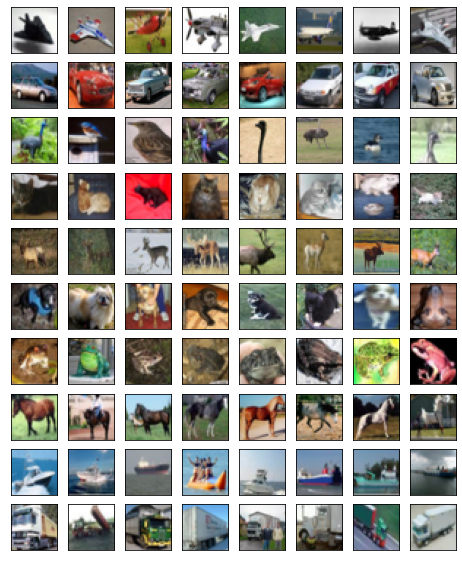

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, initializers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.datasets import cifar10

np.random.seed(0)
tf.random.set_seed(0)
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255
train_labels = tf.keras.utils.to_categorical(train_labels, 10)
test_labels = tf.keras.utils.to_categorical(test_labels, 10)
fig = plt.figure(figsize=(8, 10))
c = 0
for i in range(10):
    for j in range(len(train_images)):
        if np.argmax(train_labels[j]) == i:
            c += 1
            subplot = fig.add_subplot(10, 8, c)
            subplot.set_xticks([])
            subplot.set_yticks([])
            subplot.imshow(train_images[j])
            if c % 8 == 0:
                break
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=[0.8, 1.2],
    horizontal_flip=True,
    channel_shift_range=0.2)

train_images = train_images.reshape((len(train_images),32*32*3)).astype('float32')/255
test_images = test_images.reshape((len(test_images),32*32*3)).astype('float32')/255

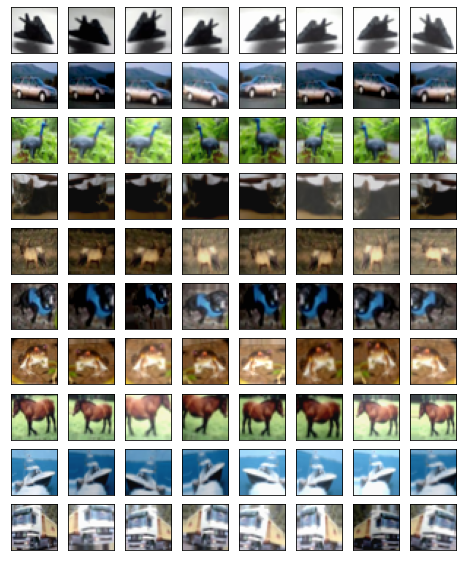

In [ ]:
fig = plt.figure(figsize=(8, 10))
c = 0
for i in range(10):
    for j in range(len(train_images)):
        if np.argmax(train_labels[j]) == i:
            break
    c += 1
    subplot = fig.add_subplot(10, 8, c)
    subplot.set_xticks([])
    subplot.set_yticks([])
    subplot.imshow(train_images[j])

    for _ in range(7):
        img = datagen.flow(np.array([train_images[j]]), batch_size=1)[0][0]
        c += 1
        subplot = fig.add_subplot(10, 8, c)
        subplot.set_xticks([])
        subplot.set_yticks([])
        subplot.imshow(img)

In [ ]:
model = models.Sequential()

model.add(layers.Dense(512, activation='relu',
                       kernel_initializer=initializers.TruncatedNormal(),
                       input_shape=(32*32*3,),
                       name='hidden'))
model.add(layers.Dense(512, activation='relu',
                       kernel_initializer=initializers.TruncatedNormal(),
                       name='hidden2'))

model.add(layers.Dense(10, activation='softmax', name='softmax'))


model.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden (Dense)              (None, 512)               1573376   
                                                                 
 hidden2 (Dense)             (None, 512)               262656    
                                                                 
 softmax (Dense)             (None, 10)                5130      
                                                                 
Total params: 1,841,162
Trainable params: 1,841,162
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['acc'])

batch_size = 64
history = model.fit(
    train_images, train_labels, batch_size=batch_size,
    validation_data=(test_images, test_labels),
    epochs=20)

Epoch 1/20
782/782 [==============================] - 18s 22ms/step - loss: 1.9265 - acc: 0.2944 - val_loss: 1.7989 - val_acc: 0.3450
Epoch 2/20
782/782 [==============================] - 17s 22ms/step - loss: 1.7335 - acc: 0.3741 - val_loss: 1.6598 - val_acc: 0.4016
Epoch 3/20
782/782 [==============================] - 17s 22ms/step - loss: 1.6515 - acc: 0.4056 - val_loss: 1.6727 - val_acc: 0.3953
Epoch 4/20
782/782 [==============================] - 17s 22ms/step - loss: 1.5926 - acc: 0.4297 - val_loss: 1.5568 - val_acc: 0.4406
Epoch 5/20
782/782 [==============================] - 18s 23ms/step - loss: 1.5390 - acc: 0.4485 - val_loss: 1.5062 - val_acc: 0.4604
Epoch 6/20
782/782 [==============================] - 17s 22ms/step - loss: 1.4977 - acc: 0.4636 - val_loss: 1.4858 - val_acc: 0.4683
Epoch 7/20
782/782 [==============================] - 17s 22ms/step - loss: 1.4631 - acc: 0.4769 - val_loss: 1.4830 - val_acc: 0.4709
Epoch 8/20
782/782 [==============================] - 17s 22ms

最後にカラーの畳み込みあり

In [ ]:
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255
train_labels = tf.keras.utils.to_categorical(train_labels, 10)
test_labels = tf.keras.utils.to_categorical(test_labels, 10)
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=[0.8, 1.2],
    horizontal_flip=True,
    channel_shift_range=0.2)

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), padding='same',
                        kernel_initializer=initializers.TruncatedNormal(),
                        use_bias=True, activation='relu',
                        input_shape=(32, 32, 3), #カラー画像であることに注意
                        name='conv_filter1-1'))
model.add(layers.Conv2D(32, (3, 3), padding='same',
                        kernel_initializer=initializers.TruncatedNormal(),
                        use_bias=True, activation='relu',
                        name='conv_filter1-2'))
model.add(layers.MaxPooling2D((2, 2), name='max_pooling1'))
model.add(layers.Dropout(rate=0.25, name='dropout1')) #25%のドロップアウトを入れる．
model.add(layers.Conv2D(64, (3, 3), padding='same',
                        kernel_initializer=initializers.TruncatedNormal(),
                        use_bias=True, activation='relu',
                        name='conv_filter2-1'))
model.add(layers.Conv2D(64, (3, 3), padding='same',
                        kernel_initializer=initializers.TruncatedNormal(),
                        use_bias=True, activation='relu',
                        name='conv_filter2-2'))
model.add(layers.MaxPooling2D((2, 2), name='max_pooling2'))
model.add(layers.Dropout(rate=0.25, name='dropout2'))

model.add(layers.Flatten(name='flatten'))
model.add(layers.Dense(512, activation='relu',
                       kernel_initializer=initializers.TruncatedNormal(),
                       name='hidden'))
model.add(layers.Dropout(rate=0.5, name='dropout3'))
model.add(layers.Dense(10, activation='softmax', name='softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv_filter1-1 (Conv2D)     (None, 32, 32, 32)        896       
                                                                 
 conv_filter1-2 (Conv2D)     (None, 32, 32, 32)        9248      
                                                                 
 max_pooling1 (MaxPooling2D)  (None, 16, 16, 32)       0         
                                                                 
 dropout1 (Dropout)          (None, 16, 16, 32)        0         
                                                                 
 conv_filter2-1 (Conv2D)     (None, 16, 16, 64)        18496     
                                                                 
 conv_filter2-2 (Conv2D)     (None, 16, 16, 64)        36928     
                                                                 
 max_pooling2 (MaxPooling2D)  (None, 8, 8, 64)        

In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['acc'])

In [ ]:
batch_size = 64
history = model.fit_generator(
    datagen.flow(train_images, train_labels, batch_size=batch_size),
    validation_data=(test_images, test_labels),
    steps_per_epoch=len(train_images) / batch_size,
    epochs=20)

Epoch 1/20


<ipython-input-18-34373bc29d0a>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


781/781 [==============================] - 297s 380ms/step - loss: 0.9651 - acc: 0.6591 - val_loss: 0.7892 - val_acc: 0.7274
Epoch 2/20
781/781 [==============================] - 286s 366ms/step - loss: 0.9391 - acc: 0.6720 - val_loss: 0.7971 - val_acc: 0.7195
Epoch 3/20
781/781 [==============================] - 286s 366ms/step - loss: 0.9150 - acc: 0.6795 - val_loss: 0.7564 - val_acc: 0.7402
Epoch 4/20
781/781 [==============================] - 285s 365ms/step - loss: 0.8956 - acc: 0.6873 - val_loss: 0.7363 - val_acc: 0.7437
Epoch 5/20
781/781 [==============================] - 285s 365ms/step - loss: 0.8823 - acc: 0.6935 - val_loss: 0.7362 - val_acc: 0.7469
Epoch 6/20
781/781 [==============================] - 286s 366ms/step - loss: 0.8641 - acc: 0.6977 - val_loss: 0.7708 - val_acc: 0.7356
Epoch 7/20
781/781 [==============================] - 285s 365ms/step - loss: 0.8536 - acc: 0.7045 - val_loss: 0.7215 - val_acc: 0.7517
Epoch 8/20
781/781 [==============================] - 287s 

白黒の画像においては、畳み込みなしでは0.9066、ありでは0.9867であり、多少の改善が見られた。
一方で、カラー画像の畳み込みなしでは0.2856、ありでは0.7404とカラー画像では畳み込みが大きく精度を変えるということが分かった。

[課題]　AEによる次元圧縮
0, 1, 2の3つの画像をそれぞれ100枚ずつ準備し、中間層で2次元まで圧縮し、散布図を表示せよ

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
tfk = tf.keras
tfkl = tfk.layers
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
print("image size : ", train_images[0].shape)
print("image components : ", train_images[0][10])

print("train_images : ", train_images.shape)
print("train_labels : ", train_labels.shape)
print("test_images : ", test_images.shape)
print("test_labels : ", test_labels.shape)
train_zero = (train_images[(train_labels == 0)].reshape(-1, 784)).T/255
train_one = (train_images[(train_labels == 1)].reshape(-1, 784)).T/255
train_two = (train_images[(train_labels == 2)].reshape(-1, 784)).T/255
train_ae = np.hstack((train_zero[:, 1000:1100], train_one[:, 1000:1100],train_two[:, 1000:1100]))

11490434/11490434 [==============================] - 0s 0us/step
image size :  (28, 28)
image components :  [  0   0   0   0   0   0   0   0   0  14   1 154 253  90   0   0   0   0
   0   0   0   0   0   0   0   0   0   0]
train_images :  (60000, 28, 28)
train_labels :  (60000,)
test_images :  (10000, 28, 28)
test_labels :  (10000,)


In [ ]:
model = models.Sequential([
        tfkl.Dense(2, activation='relu', input_shape=(28*28,)), 
        tfkl.Dense(784, activation='relu')
])
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2)                 1570      
                                                                 
 dense_1 (Dense)             (None, 784)               2352      
                                                                 
Total params: 3,922
Trainable params: 3,922
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam', loss='mse')

history = model.fit(train_ae.T, train_ae.T,
                    batch_size= 16, epochs=10,
                    shuffle=True, validation_data=(train_ae.T, train_ae.T))

Epoch 1/10
19/19 [==============================] - 1s 23ms/step - loss: 0.1142 - val_loss: 0.1063
Epoch 2/10
19/19 [==============================] - 0s 13ms/step - loss: 0.1000 - val_loss: 0.0939
Epoch 3/10
19/19 [==============================] - 0s 4ms/step - loss: 0.0910 - val_loss: 0.0887
Epoch 4/10
19/19 [==============================] - 0s 4ms/step - loss: 0.0879 - val_loss: 0.0870
Epoch 5/10
19/19 [==============================] - 0s 4ms/step - loss: 0.0865 - val_loss: 0.0857
Epoch 6/10
19/19 [==============================] - 0s 4ms/step - loss: 0.0851 - val_loss: 0.0844
Epoch 7/10
19/19 [==============================] - 0s 6ms/step - loss: 0.0839 - val_loss: 0.0831
Epoch 8/10
19/19 [==============================] - 0s 4ms/step - loss: 0.0824 - val_loss: 0.0815
Epoch 9/10
19/19 [==============================] - 0s 6ms/step - loss: 0.0810 - val_loss: 0.0802
Epoch 10/10
19/19 [==============================] - 0s 4ms/step - loss: 0.0796 - val_loss: 0.0789


散布図は以下のようになる。赤が0、青が1、緑が2に対応している。

Text(0, 0.5, 'y')

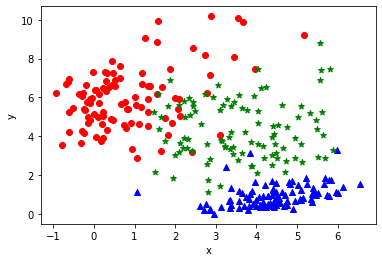

In [ ]:
ae_w = model.layers[0].get_weights()[0]

ae_x, ae_y = np.dot(ae_w.T, train_ae)
plt.scatter(ae_x[:100], ae_y[:100], marker="o", color='Red')
plt.scatter(ae_x[100:200], ae_y[100:200], marker="^", color='Blue')
plt.scatter(ae_x[200:], ae_y[200:], marker="*", color='Green')
plt.xlabel("x")
plt.ylabel("y")
